<a href="https://colab.research.google.com/github/Marcin19721205/Wprowadzenie-Do-Sieci-Neuronowych/blob/main/15_Keras07_fashion_MNIST_01MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Klasyfikator wieloklasowy - Image Recognition

Celem tego notebook'a jest budowa modelu klasyfikacji obrazów przedstawiających różne elementy ubioru. W tym celu wykorzystamy kolejny popularny zbiór danych w dziedzinie sieci neuronowych: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST to zestaw danych z obrazkami artykułów Zalando - składający się z zestawu treningowego 60 000 przykładów i zestawu testowego 10 000 przykładów. Każdy przykład to obraz w skali szarości 28 x 28, powiązany z jedną etykietą z 10 klas.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

#### Przykładowe obrazy
<img src='https://storage.cloud.google.com/esmartdata-courses-files/ann-course/zalando10x10.jpeg' width=600>




### Spis treści:
1. [Import bibliotek](#a0)
2. [Załadowanie danych i wstępna eksploracja](#a1)
3. [Budowa modelu](#a2)
4. [Ocena modelu](#a3)
5. [Predykcja na podstawie modelu](#a4)
6. [Eksploracja predykcji](#a5)
7. [Błędnie sklasyfikowane obrazy](#a6)
8. [Klika możliwości poprawy modeli](#a7)



### <a name='a0'></a> 1. Import bibliotek

In [1]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.19.0'

### <a name='a1'></a> 2. Załadowanie danych i wstępna eksploracja

Dane do tego modelu są już przygotowane

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Rozmiar danych

Mamy 60000 uczących danych, więc spokojnie 100000-200000 parametrów

In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,  72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88, 172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0, 200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243, 202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12, 219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197, 209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99, 244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119, 167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55, 236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,  92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237, 226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,  77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228, 207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244, 159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217, 226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238, 215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200, 159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232, 246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,  80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228, 225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217, 241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224, 229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198, 213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221, 230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219, 221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205, 206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211, 210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177, 210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189, 188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216, 170,   0],
       [  2,   0,   0,   0,  66, 200, 222, 237, 239, 242, 246, 243, 244, 221, 220, 193, 191, 179, 182, 182, 181, 176, 166, 168,  99,  58,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  40,  61,  44,  72,  41,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

#Kolumna labeli - targetu

In [5]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

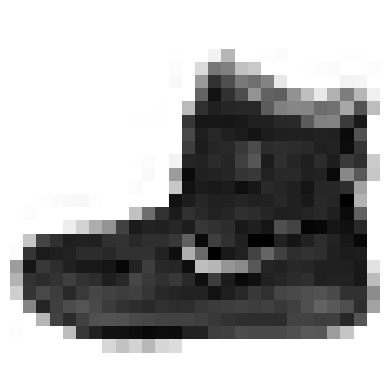

In [6]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

Wyświetlenie danych jako obrazek, oraz label jako nazwa klasy

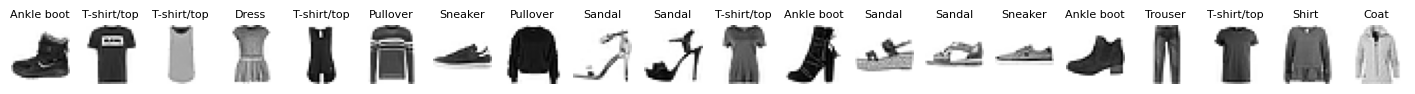

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #nazwy klas

plt.figure(figsize=(18, 13))
for i in range(1, 21):
    plt.subplot(1, 20, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i-1]], color='black', fontsize=8)
plt.show()

#NORMALIZACJA / STANDARYZACJA

In [12]:
X_train = X_train / 255.
X_test = X_test / 255.

In [13]:
X_train[0]

array([[0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            ],
       [0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            ],
       [0.            , 0.            

### <a name='a2'></a> 3. Budowa modelu

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #spłassczenie danych wejściowych do wektora
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**epochs** - ile razy zestaw treningowy zostanie przetworzony przez model.
Przy każdej iteracji optymalizator próbuje dopasować wagi, aby
funkcja celu została zminimalizowana.

**batch_size** - liczba przykładów treningowych po której następuje aktualizacji wag

**validation_split** - procent danych użytych do walidacji

In [15]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.7844 - loss: 0.6106 - val_accuracy: 0.8544 - val_loss: 0.4011
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8583 - loss: 0.3856 - val_accuracy: 0.8630 - val_loss: 0.3766
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8765 - loss: 0.3371 - val_accuracy: 0.8717 - val_loss: 0.3623
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8833 - loss: 0.3179 - val_accuracy: 0.8653 - val_loss: 0.3856
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8903 - loss: 0.2933 - val_accuracy: 0.8341 - val_loss: 0.4485
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8952 - loss: 0.2800 - val_accuracy: 0.8802 - val_loss: 0.3231
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8995 - loss: 0.2664 - val_accuracy: 0.8827 - val_loss: 0.3306
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9001 - loss: 0

In [16]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.825688,0.492913,0.854417,0.401073,0
1,0.862833,0.374531,0.863000,0.376610,1
2,0.876938,0.336206,0.871750,0.362349,2
3,0.883917,0.313391,0.865333,0.385603,3
4,0.889750,0.297287,0.834083,0.448455,4
5,0.894958,0.284625,0.880250,0.323080,5
6,0.898167,0.270782,0.882750,0.330589,6
7,0.902625,0.260827,0.886083,0.320113,7
8,0.903708,0.252100,0.878583,0.341959,8
9,0.908583,0.242374,0.880000,0.360772,9


### <a name='a3'></a> 4. Ocena modelu

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

#Zbiór testowy nie był używany przy uczeniu i walidacji
#robimy jego evaluatiion

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(test_acc)
# dla 1 ukrytej, 128 neuronów, 10 Epoch = accuracy test = 0.8695999979972839

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8714 - loss: 0.3840
0.8695999979972839


### <a name='a4'></a> 5. Predykcja na podstawie modelu:
* **model.evaluate(y_true, y_pred)** - pozwala obliczyć metryki modelu
* **model.predict_classes()** - pozwala zwrócić odpowiednio przewidziane klasy
* **model.predict_proba(), model.predict()** - pozwala zwrócić prawdopodobieństwo danej klasy

Tworzenie Tablicy predykcji dla danych testowych w oparciu o model

In [23]:
predictions = model.predict(X_test)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.000000117237, 0.000000000007, 0.000000000005, ..., 0.013430371   , 0.000000179475, 0.98571706    ],
       [0.000003621255, 0.            , 0.99921113    , ..., 0.            , 0.            , 0.            ],
       [0.000000000071, 0.99999994    , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000004689033, 0.            , 0.000000002736, ..., 0.            , 0.9999947     , 0.            ],
       [0.000000000009, 0.9999998     , 0.            , ..., 0.            , 0.000000002837, 0.            ],
       [0.00002523479 , 0.000000000151, 0.0000903622  , ..., 0.00046319235 , 0.000043779684, 0.000017800194]], dtype=float32)

Konwersja na tablicę prawdopodobieństw - klasa softmax dale sigmoid na każdym elemencie wektora targetu

element 0 - wiersz 0 - daje prawdodobieństwo 98,5% dla klasy 9

In [22]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000852,0.000000,0.013430,0.000000,0.985717
1,0.000004,0.000000,0.999211,0.000000,0.000777,0.000000,0.000008,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.044126,0.000000,0.000433,0.000013,0.000253,0.000000,0.955175,0.000000,0.000000,0.000000


Przewidywanie prawdopbienstwa - wyświetla po kolei przediwynie dla wchodzących próbek - już z dokłądnym przyporządkowaniem

In [32]:
predictions_cls = np.argmax(model.predict(X_test), axis=-1)
predictions_cls


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

### <a name='a5'></a> 6. Eksploracja predykcji

In [39]:
#@title Wybierz indeks zdjęcia:
idx = 9052 # @param {"type":"slider","min":0,"max":10000,"step":1}

if predictions_cls[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v',
                     marker_color=color))
fig.update_layout(width=800, title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

/tmp/ipython-input-2806946817.py:19: DeprecationWarning:

'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)



### <a name='a6'></a> 7. Błędnie sklasyfikowane obrazy

In [41]:
#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 555 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names,
                     y=predictions_df.iloc[index_mapper[idx]],
                     orientation='v',
                     marker_color='red'))

fig.update_layout(width=800,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

/tmp/ipython-input-1364387302.py:31: DeprecationWarning:

'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)



### <a name='a7'></a> 8. Klika możliwości poprawy modeli:
* zwiększenie liczby epok
* zwiększenie/zmniejszenie parametrów uczenia, stronjenie hiperparametrów
* zwiększenie/zmniejszenie liczby neuronów wewnątrz wartsw uktytych
* zwiększenie/zmniejszenie parametru **batch_size**, czyli rozmiaru wsadu
* zwiększenie/zmniejszenie liczby warstw ukrytych
* zastosowanie regularyzacji (L1 - lasso, L2 - ridge), warstwy Dropout
